In [1]:
import os, sys
d = os.path.dirname(os.getcwd())
sys.path.append(d)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from utils.layers_new import GumbelSoftmax

In [2]:
const_lin =  tf.constant([[1.0, 1.0, 3.0, 4.0],[10.0, 78.0, 5.0, 80.0]])
const = tf.constant([[0.1, 0.15, 0.35, 0.4],[0.1, 0.05, 0.05, 0.8]])
const_log = tf.math.log(const)
layer_soft = tf.keras.layers.Softmax()
layer = GumbelSoftmax(0.1)

In [5]:
print(layer_soft(const_lin).numpy())

[[3.3927526e-02 3.3927526e-02 2.5069240e-01 6.8145263e-01]
 [3.5015647e-31 1.1920292e-01 2.3593354e-33 8.8079703e-01]]


In [6]:
idx = 0
list_ = []
mean = 0
var = []
for i in range(1000):
    #c = layer(tf.math.log(layer_soft(const_lin))).numpy()[idx,:]
    c = layer(const_lin).numpy()[idx,:]
    list_.append(np.argmax(c))
    mean += np.max(c)
    var.append(np.max(c))
mean /= 1000
varience = np.std(var)

(array([0.048, 0.03 , 0.251, 0.671]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

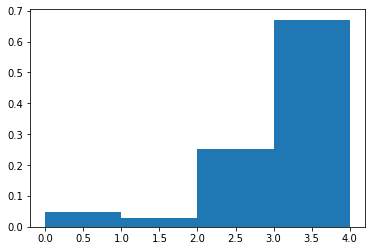

In [7]:
plt.hist(list_, bins = [0,1,2,3,4], density=True, align="mid", rwidth = 1)

In [8]:
print(mean)
print(varience)

0.966752332419157
0.09705407
